In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
date_range = pd.date_range(start="2021-01-01", end="2023-12-01", freq="MS")
dates = list(date_range) * 5  
companies = ["Firm_A", "Firm_B", "Firm_C", "Firm_D", "Firm_E"]
industries = ["Tech", "Retail", "Finance"]


df = pd.DataFrame({
    "Date": dates,
    "Company": np.tile(companies, len(date_range)),  
    "Industry": np.random.choice(industries, size=len(dates)),  
    "Revenue": np.random.randint(low=1000, high=100000, size=len(dates)),
    "Costs": np.random.randint(low=5000, high=80000, size=len(dates)),
})
df

,Date,Company,Industry,Revenue,Costs
0,2021-01-01,Firm_A,Retail,35525,20385
1,2021-02-01,Firm_B,Retail,32101,54448
2,2021-03-01,Firm_C,Retail,34293,68940
3,2021-04-01,Firm_D,Tech,7851,40325
4,2021-05-01,Firm_E,Retail,38593,53537
...,...,...,...,...,...
175,2023-08-01,Firm_A,Tech,17986,73709
176,2023-09-01,Firm_B,Retail,27210,50003
177,2023-10-01,Firm_C,Retail,86051,54482
178,2023-11-01,Firm_D,Finance,5479,45697


In [6]:
df["Profit"] = df["Revenue"] - df["Costs"]
df.head(2)

,Date,Company,Industry,Revenue,Costs,Profit
0,2021-01-01,Firm_A,Retail,35525,20385,15140
1,2021-02-01,Firm_B,Retail,32101,54448,-22347


In [10]:
#Policz średni Profit Margin każdej firmy
#Profit margin = Profit/Revenue * 100%
df["Profit_Margin_%"] = round(df["Profit"]/df["Revenue"] * 100,2)
df.head(2)

,Date,Company,Industry,Revenue,Costs,Profit,Profit_Margin_%
0,2021-01-01,Firm_A,Retail,35525,20385,15140,42.62
1,2021-02-01,Firm_B,Retail,32101,54448,-22347,-69.61


In [19]:
#Znajdź firmę z najwyższym i najniższym Profit Margin
top_pm = df.iloc[df["Profit_Margin_%"].idxmax()]["Company"]
lowest_pm = df.iloc[df["Profit_Margin_%"].idxmin()]["Company"]
highest_pm = df["Profit_Margin_%"].max()
lowest_pm_v = df["Profit_Margin_%"].min()
print(f"Firma z najwyzszym profit margin:\n{top_pm}, z {highest_pm} profit margin.\nFirma z najnizszym profit margin:\n{lowest_pm}, z {lowest_pm_v} profit margin.")

Firma z najwyzszym profit margin:
Firm_E, z 93.36 profit margin.
Firma z najnizszym profit margin:
Firm_E, z -6181.83 profit margin.


In [27]:
negative_profits = df[df["Profit"] < 0]
print(f"Liczba firm z ujemnym Profit Margin: {len(negative_profits)}")


Liczba firm z ujemnym Profit Margin: 78


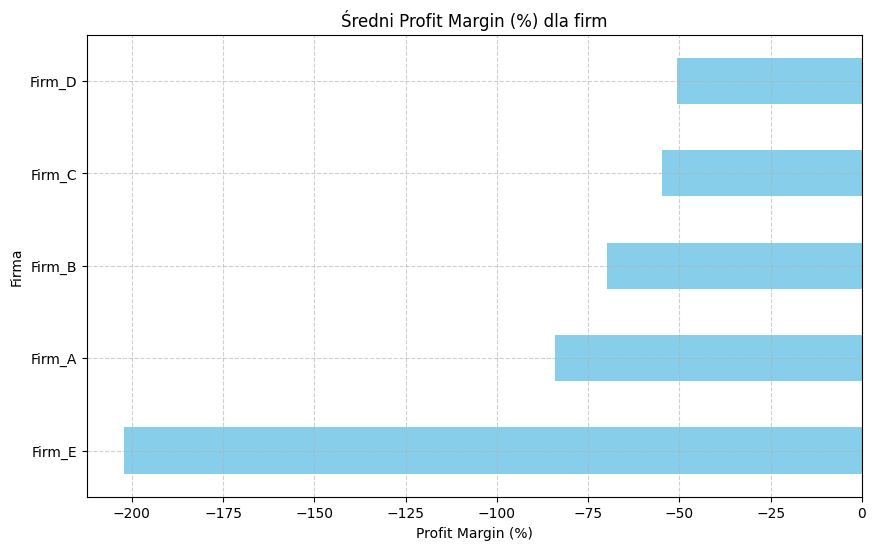

In [28]:
df.groupby("Company")["Profit_Margin_%"].mean().sort_values().plot(kind="barh", figsize=(10, 6), color="skyblue")
plt.title("Średni Profit Margin (%) dla firm")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Firma")
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.show()


In [22]:
#Oblicz średnią miesięczną zyskowność w każdej branży (Industry)
df['Month'] = pd.DatetimeIndex(df['Date']).month



,Date,Company,Industry,Revenue,Costs,Profit,Profit_Margin_%,Month
0,2021-01-01,Firm_A,Retail,35525,20385,15140,42.62,1
1,2021-02-01,Firm_B,Retail,32101,54448,-22347,-69.61,2
2,2021-03-01,Firm_C,Retail,34293,68940,-34647,-101.03,3
3,2021-04-01,Firm_D,Tech,7851,40325,-32474,-413.63,4
4,2021-05-01,Firm_E,Retail,38593,53537,-14944,-38.72,5


In [26]:
avg_monthly_profit_by_industry = df.groupby(["Industry","Month"])["Profit"].mean()
avg_monthly_profit_by_industry
#for index,value in enumerate(avg_monthly_profit_by_industry):
    #print(f"{index} {value}")

Industry  Month
Finance   1       -20593.714286
          2        28947.000000
          3        29369.666667
          4         6108.500000
          5        -6615.000000
          6        24964.750000
          7        25960.500000
          8        25827.333333
          9        45789.400000
          10      -10056.500000
          11      -25162.000000
          12       20086.333333
Retail    1        18954.800000
          2         -843.125000
          3        13640.000000
          4        34774.000000
          5         8943.000000
          6         4731.125000
          7         4796.000000
          8        13011.166667
          9       -19584.333333
          10        5408.833333
          11        1986.200000
          12        2593.333333
Tech      1        12418.666667
          2       -23478.000000
          3        11704.428571
          4         4477.000000
          5        18950.333333
          6         7247.000000
          7        -3906